In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de texto
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Configuraciones
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

nlp = spacy.load('es_core_news_sm')
nltk.download('stopwords')

# Descargar recursos necesarios de NLTK
try:
    nltk.download('stopwords')
    nltk.download('punkt')
except:
    print("Error al descargar recursos de NLTK, pero continuaremos con el análisis")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aberr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aberr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aberr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Cargar el archivo CSV
data = pd.read_csv('../data.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
data.head()

Primeras 5 filas del dataset:


,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared


In [3]:
# Información básica del dataset
print("\nInformación sobre el dataset:")
data.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
data.describe(include='all')


Información sobre el dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       2590 non-null   object
 1   text       2590 non-null   object
 2   date       2590 non-null   object
 3   emotion    2590 non-null   object
 4   sentiment  2590 non-null   object
dtypes: object(5)
memory usage: 101.3+ KB

Estadísticas descriptivas:


,user,text,date,emotion,sentiment
count,2590,2590,2590,2590,2590
unique,2083,2191,949,20,6
top,@Yaramsi3,"Para entender el mundo, lee. Para entenderte ...","Jan 6, 2024 · 3:38 AM UTC",sleepy,peaceful
freq,12,6,25,150,660


In [4]:
# Verificar valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()


Valores nulos por columna:


user         0
text         0
date         0
emotion      0
sentiment    0
dtype: int64


Distribución de sentimientos:
sentiment
peaceful    660
mad         530
powerful    420
sad         360
joyful      350
scared      270
Name: count, dtype: int64


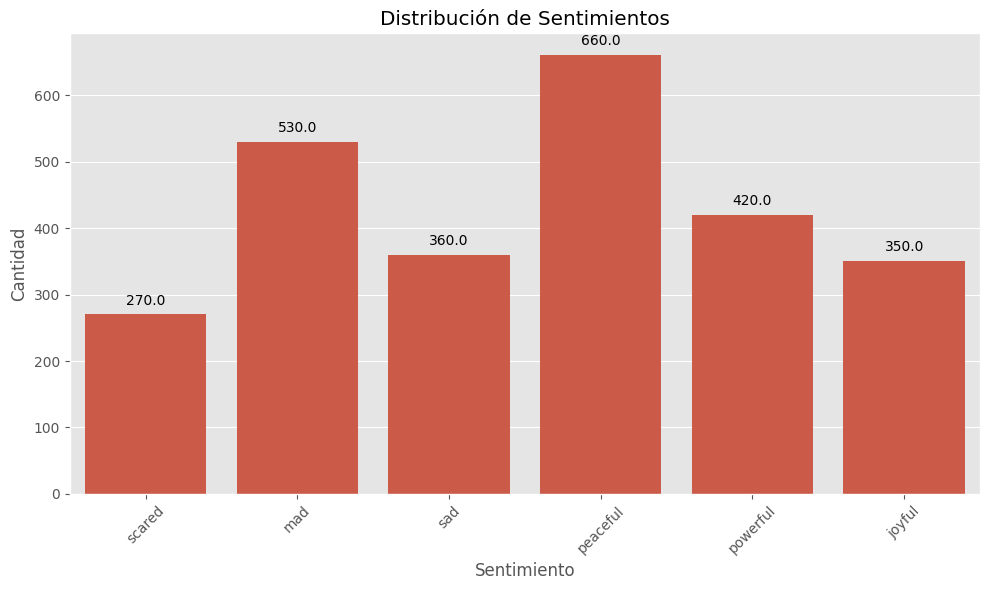

In [5]:
# Distribución de sentimientos
print("\nDistribución de sentimientos:")
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

# Visualizar la distribución de sentimientos
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', data=data)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Añadir etiquetas de cantidad
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


Distribución de emociones:
emotion
sleepy         150
thankful       150
overwhelmed    140
jealous        140
irritated      140
surprised      140
successful     140
confident      140
secure         140
loving         130
playful        130
relaxed        130
embarrassed    130
distant        130
isolated       120
frustrated     120
responsive     110
optimistic     110
daring         110
stupid          90
Name: count, dtype: int64


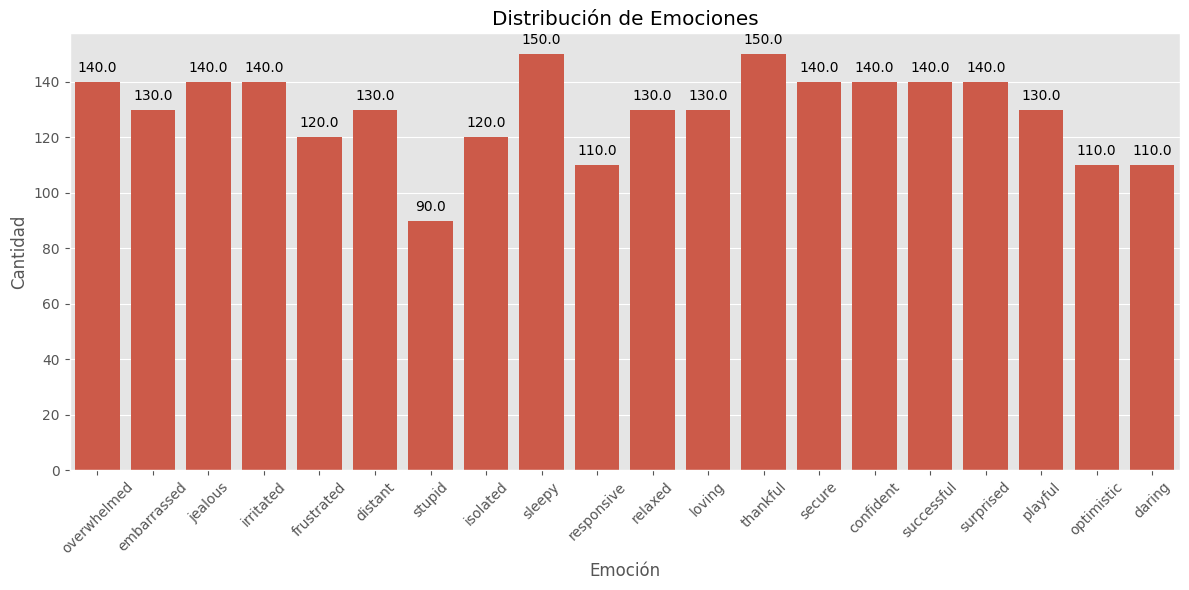

In [6]:
# Distribución de emociones
print("\nDistribución de emociones:")
emotion_counts = data['emotion'].value_counts()
print(emotion_counts)

# Visualizar la distribución de emociones
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='emotion', data=data)
plt.title('Distribución de Emociones')
plt.xlabel('Emoción')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Añadir etiquetas de cantidad
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


Tabla de contingencia entre emociones y sentimientos:
sentiment    joyful  mad  peaceful  powerful  sad  scared
emotion                                                  
confident         0    0         0       140    0       0
daring          110    0         0         0    0       0
distant           0  130         0         0    0       0
embarrassed       0    0         0         0    0     130
frustrated        0  120         0         0    0       0
irritated         0  140         0         0    0       0
isolated          0    0         0         0  120       0
jealous           0  140         0         0    0       0
loving            0    0       130         0    0       0
optimistic      110    0         0         0    0       0
overwhelmed       0    0         0         0    0     140
playful         130    0         0         0    0       0
relaxed           0    0       130         0    0       0
responsive        0    0       110         0    0       0
secure           

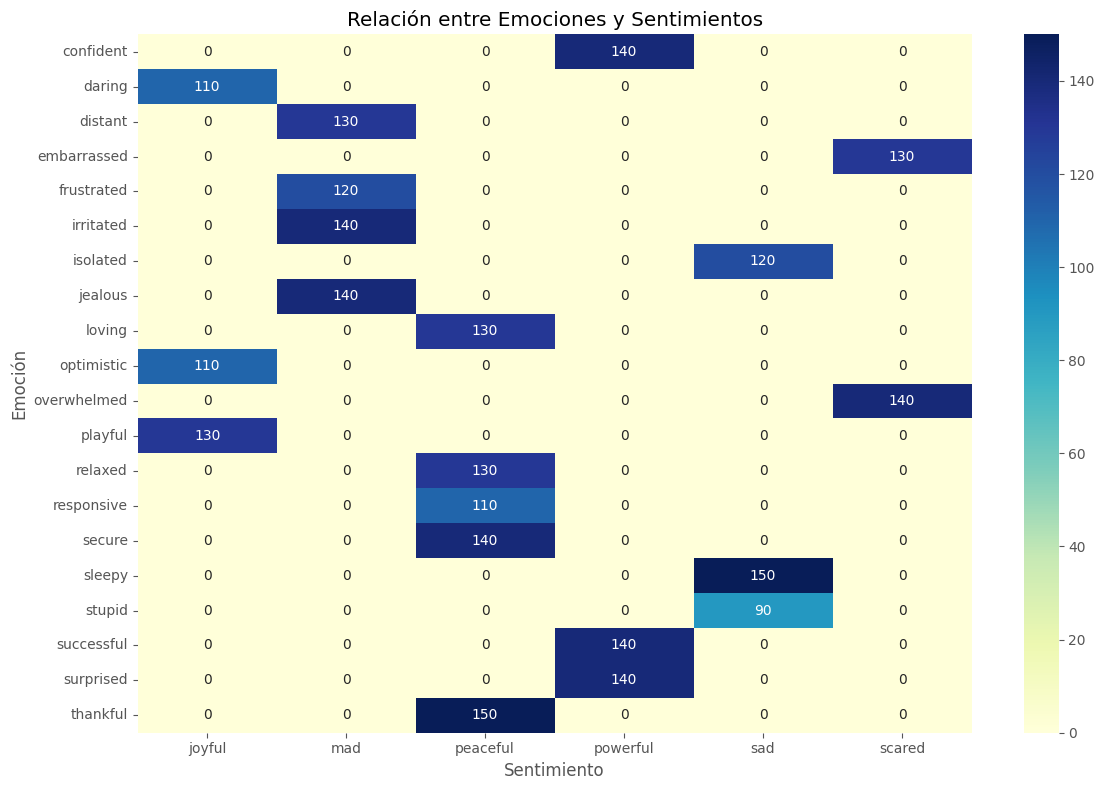

In [7]:
# Relación entre emociones y sentimientos
print("\nTabla de contingencia entre emociones y sentimientos:")
emotion_sentiment = pd.crosstab(data['emotion'], data['sentiment'])
print(emotion_sentiment)

# Visualizar la relación
plt.figure(figsize=(12, 8))
sns.heatmap(emotion_sentiment, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relación entre Emociones y Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Emoción')
plt.tight_layout()
plt.show()

In [9]:
# Función para limpiar y preprocesar texto
def preprocess_text(text):
    if isinstance(text, str):
        # Convertir a minúsculas
        text = text.lower()
        
        # Eliminar URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # Eliminar menciones (@usuario)
        text = re.sub(r'@\w+', '', text)
        
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)
        
        # Eliminar caracteres especiales, números y puntuaciones
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        
        # Eliminar espacios múltiples
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    else:
        return ''

# Aplicar la función de preprocesamiento al texto
data['clean_text'] = data['text'].apply(preprocess_text)

# Mostrar ejemplos de textos limpios
print("\nEjemplos de textos después del preprocesamiento:")
for i in range(5):
    print(f"Original: {data['text'].iloc[i]}")
    print(f"Limpio: {data['clean_text'].iloc[i]}")
    print("-" * 80)


Ejemplos de textos después del preprocesamiento:
Original: termine bien abrumado después de hoy
Limpio: termine bien abrumado después de hoy
--------------------------------------------------------------------------------
Original: me siento abrumado
Limpio: me siento abrumado
--------------------------------------------------------------------------------
Original: Me siento un poco abrumado por la cantidad de cosas que quiero dibujar, ver, jugar y leer. Odio esta sensación xdddd
Limpio: me siento un poco abrumado por la cantidad de cosas que quiero dibujar ver jugar y leer odio esta sensación xdddd
--------------------------------------------------------------------------------
Original: Salvador la única persona que no la ha abrumado de versiones❤😒❤ #NadieComoTú
Limpio: salvador la única persona que no la ha abrumado de versiones
--------------------------------------------------------------------------------
Original: Denme un helado o algo que ando full abrumado.
Limpio: denme un

In [10]:
# Cargar stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Añadir algunas stopwords adicionales específicas 
additional_stopwords = ['si', 'xq', 'q', 'x', 'k', 'qe', 'pq', 'rt', 'xa', 'xo', 'jaja', 'jajaja', 'jajajaja']
spanish_stopwords.extend(additional_stopwords)


# Función para aplicar lematización y eliminar stopwords
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        # Procesar texto con spaCy
        doc = nlp(text)

        # Eliminar stopwords y puntuación, aplicar lematización
        lemmas = [token.lemma_ for token in doc if token.lemma_.lower() not in spanish_stopwords and len(token.lemma_) > 2 and not token.is_punct]

        return ' '.join(lemmas)
    else:
        return ''

# Aplicar tokenización y stemming
data['processed_text'] = data['clean_text'].apply(tokenize_and_lemmatize)

# Mostrar ejemplos después del procesamiento completo
print("\nEjemplos de textos después del procesamiento completo:")
for i in range(5):
    print(f"Original: {data['text'].iloc[i]}")
    print(f"Limpio: {data['clean_text'].iloc[i]}")
    print(f"Procesado: {data['processed_text'].iloc[i]}")
    print("-" * 80)


Ejemplos de textos después del procesamiento completo:
Original: termine bien abrumado después de hoy
Limpio: termine bien abrumado después de hoy
Procesado: terminar bien abrumar después hoy
--------------------------------------------------------------------------------
Original: me siento abrumado
Limpio: me siento abrumado
Procesado: sentir abrumado
--------------------------------------------------------------------------------
Original: Me siento un poco abrumado por la cantidad de cosas que quiero dibujar, ver, jugar y leer. Odio esta sensación xdddd
Limpio: me siento un poco abrumado por la cantidad de cosas que quiero dibujar ver jugar y leer odio esta sensación xdddd
Procesado: sentir abrumar cantidad cosa querer dibujar ver jugar leer odio sensación xdddd
--------------------------------------------------------------------------------
Original: Salvador la única persona que no la ha abrumado de versiones❤😒❤ #NadieComoTú
Limpio: salvador la única persona que no la ha abrumad

In [11]:
# Preparar características y variable objetivo
X = data['processed_text']
y = data['sentiment']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar la distribución de las clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nDistribución de clases en conjunto de prueba:")
print(y_test.value_counts())

Distribución de clases en conjunto de entrenamiento:
sentiment
peaceful    528
mad         424
powerful    336
sad         288
joyful      280
scared      216
Name: count, dtype: int64

Distribución de clases en conjunto de prueba:
sentiment
peaceful    132
mad         106
powerful     84
sad          72
joyful       70
scared       54
Name: count, dtype: int64


In [12]:
# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limitar a las 5000 características más relevantes
    min_df=2,           # Ignorar términos que aparecen en menos de 2 documentos
    max_df=0.85,        # Ignorar términos que aparecen en más del 85% de los documentos
    ngram_range=(1, 2)  # Considerar unigramas y bigramas
)

# Transformar los textos a vectores TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Mostrar información sobre la matriz de características
print(f"Número de características: {X_train_tfidf.shape[1]}")
print(f"Dimensiones de X_train_tfidf: {X_train_tfidf.shape}")
print(f"Dimensiones de X_test_tfidf: {X_test_tfidf.shape}")

Número de características: 5000
Dimensiones de X_train_tfidf: (2072, 5000)
Dimensiones de X_test_tfidf: (518, 5000)


In [14]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Imprimir resultados
    print(f"\n--- Resultados del modelo: {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Imprimir informe de clasificación detallado
    print("\nInforme de clasificación:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()
    
    return model, accuracy, precision, recall, f1


--- Resultados del modelo: Naive Bayes ---
Accuracy: 0.5232
Precision: 0.6088
Recall: 0.5232
F1 Score: 0.4874

Informe de clasificación:
              precision    recall  f1-score   support

      joyful       0.81      0.24      0.37        70
         mad       0.61      0.74      0.67       106
    peaceful       0.42      0.89      0.57       132
    powerful       0.67      0.40      0.50        84
         sad       0.65      0.21      0.32        72
      scared       0.67      0.19      0.29        54

    accuracy                           0.52       518
   macro avg       0.64      0.44      0.45       518
weighted avg       0.61      0.52      0.49       518



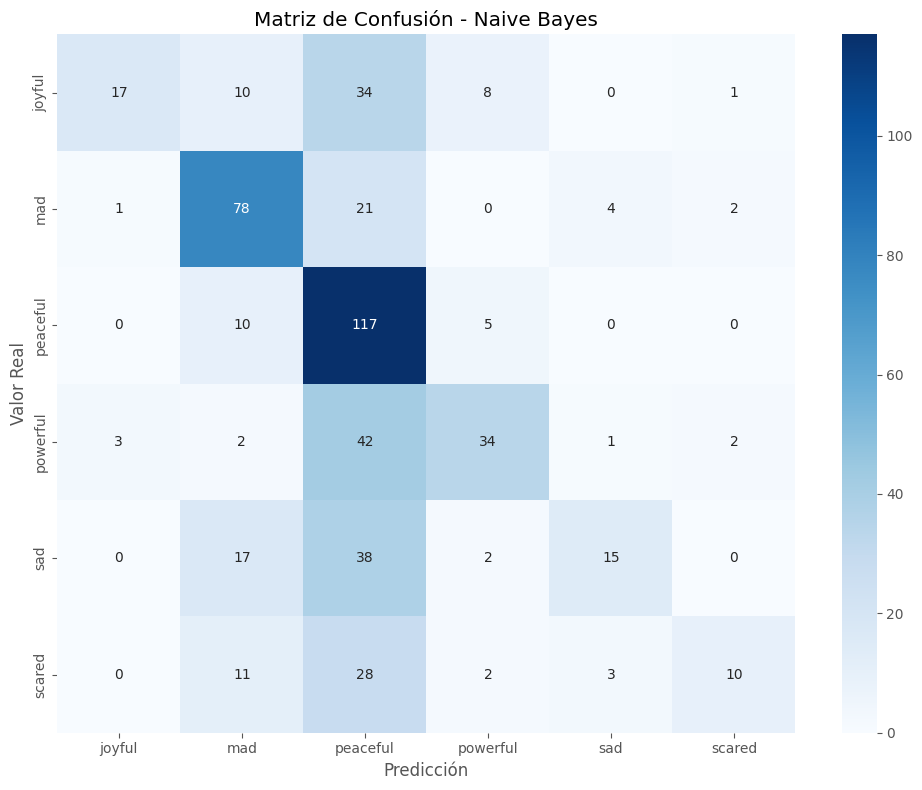

In [15]:
# Inicializar el modelo Multinomial Naive Bayes
nb_model = MultinomialNB()

# Entrenar y evaluar el modelo
nb_results = evaluate_model(nb_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "Naive Bayes")


--- Resultados del modelo: SVM ---
Accuracy: 0.6718
Precision: 0.6827
Recall: 0.6718
F1 Score: 0.6696

Informe de clasificación:
              precision    recall  f1-score   support

      joyful       0.67      0.54      0.60        70
         mad       0.69      0.73      0.71       106
    peaceful       0.59      0.79      0.67       132
    powerful       0.75      0.65      0.70        84
         sad       0.69      0.50      0.58        72
      scared       0.79      0.70      0.75        54

    accuracy                           0.67       518
   macro avg       0.70      0.65      0.67       518
weighted avg       0.68      0.67      0.67       518



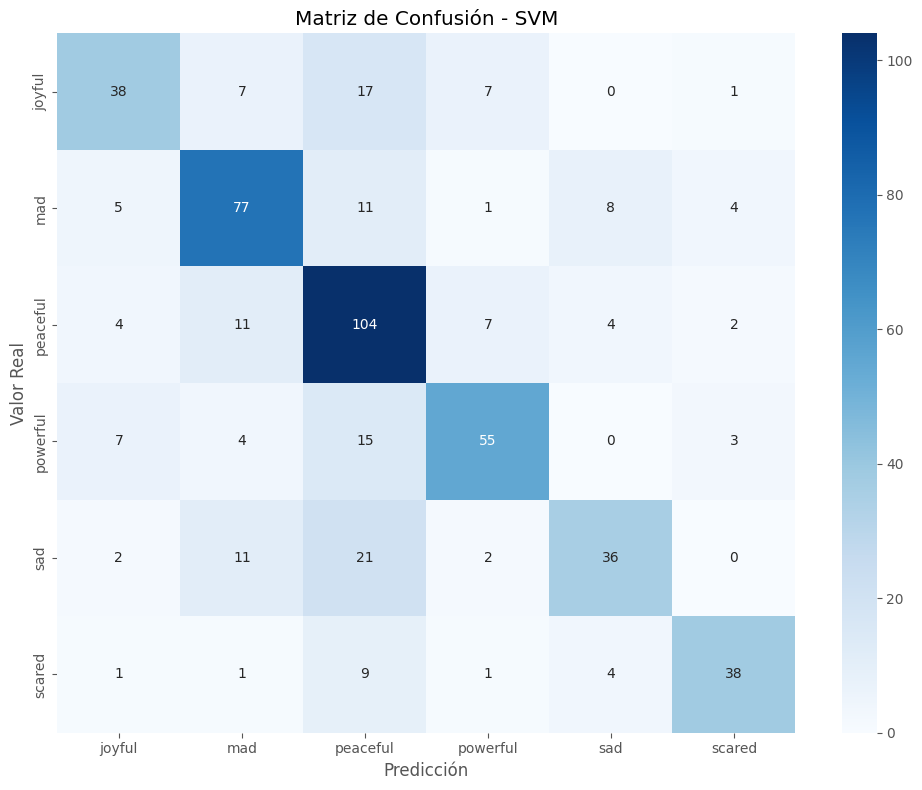

In [16]:
# Inicializar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entrenar y evaluar el modelo
svm_results = evaluate_model(svm_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "SVM")


--- Resultados del modelo: KNN ---
Accuracy: 0.3263
Precision: 0.5555
Recall: 0.3263
F1 Score: 0.3433

Informe de clasificación:
              precision    recall  f1-score   support

      joyful       0.16      0.80      0.27        70
         mad       0.71      0.38      0.49       106
    peaceful       0.68      0.26      0.37       132
    powerful       0.58      0.17      0.26        84
         sad       0.32      0.10      0.15        72
      scared       0.72      0.33      0.46        54

    accuracy                           0.33       518
   macro avg       0.53      0.34      0.33       518
weighted avg       0.56      0.33      0.34       518



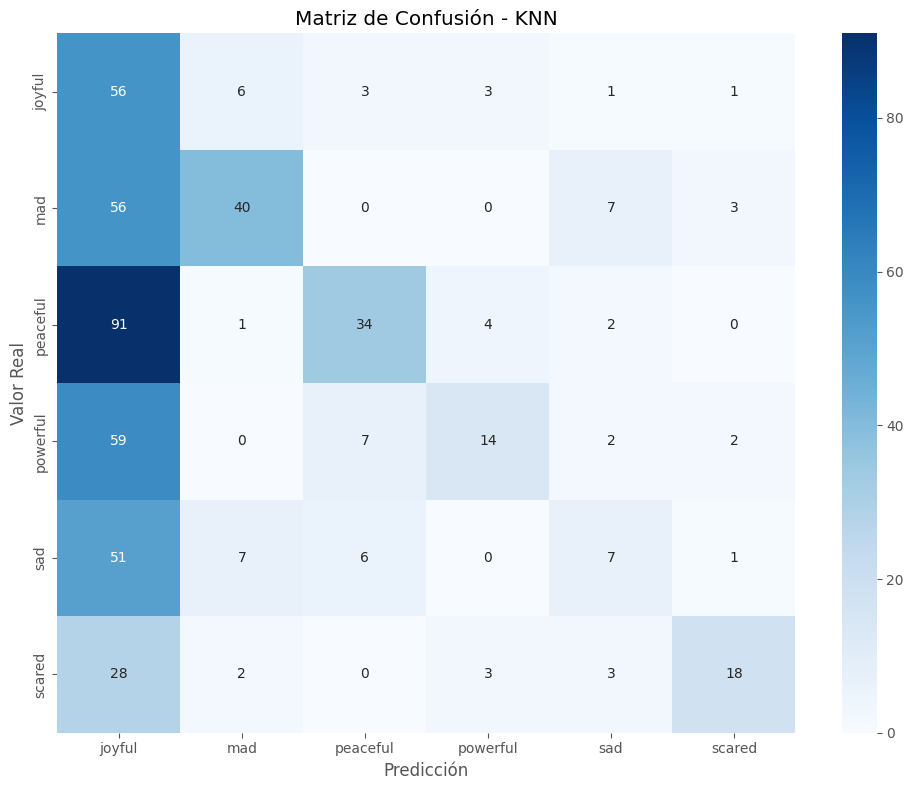

In [17]:
# Inicializar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Entrenar y evaluar el modelo
knn_results = evaluate_model(knn_model, X_train_tfidf, X_test_tfidf, y_train, y_test, "KNN")

Comparación de modelos:
        Modelo  Accuracy  Precision    Recall  F1 Score
0  Naive Bayes  0.523166   0.608830  0.523166  0.487435
1          SVM  0.671815   0.682705  0.671815  0.669624
2          KNN  0.326255   0.555519  0.326255  0.343337


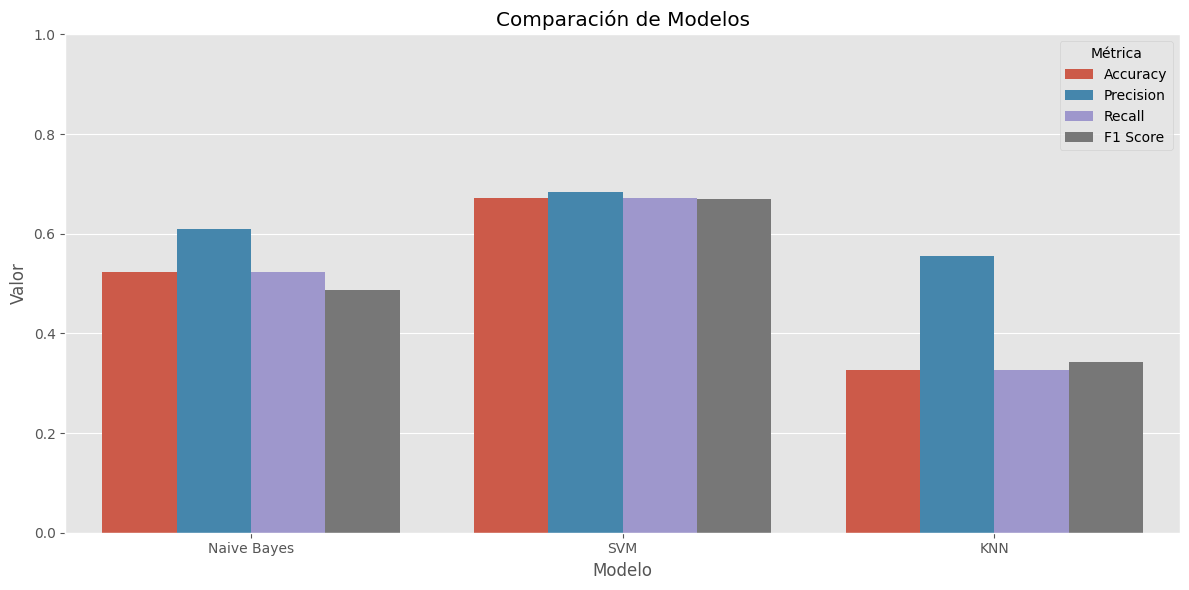

In [18]:
# Compilar resultados
models = ['Naive Bayes', 'SVM', 'KNN']
accuracy = [nb_results[1], svm_results[1], knn_results[1]]
precision = [nb_results[2], svm_results[2], knn_results[2]]
recall = [nb_results[3], svm_results[3], knn_results[3]]
f1 = [nb_results[4], svm_results[4], knn_results[4]]

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Modelo': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Mostrar tabla de resultados
print("Comparación de modelos:")
print(results_df)

# Visualizar comparación
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results_melted = pd.melt(results_df, id_vars='Modelo', value_vars=metrics, 
                         var_name='Métrica', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=results_melted)
plt.title('Comparación de Modelos')
plt.ylim(0, 1)
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

In [19]:
# Identificar el mejor modelo basado en F1 Score
best_model_index = results_df['F1 Score'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Modelo']
print(f"El mejor modelo basado en F1 Score es: {best_model_name}")

# Configurar pipeline y parámetros para optimización
if best_model_name == 'Naive Bayes':
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])
    
    parameters = {
        'tfidf__max_features': [3000, 5000, 7000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__alpha': [0.1, 0.5, 1.0]
    }
    
elif best_model_name == 'SVM':
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', SVC(random_state=42))
    ])
    
    parameters = {
        'tfidf__max_features': [3000, 5000, 7000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 1.0, 10.0],
        'clf__kernel': ['linear', 'rbf']
    }
    
else:  # KNN
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', KNeighborsClassifier())
    ])
    
    parameters = {
        'tfidf__max_features': [3000, 5000, 7000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance']
    }

# Realizar búsqueda de mejores parámetros con validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Imprimir mejores parámetros
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo optimizado
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

print("\nResultados del modelo optimizado:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_optimized, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_optimized, average='weighted'):.4f}")

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred_optimized))

El mejor modelo basado en F1 Score es: SVM

Mejores parámetros encontrados:
{'clf__C': 10.0, 'clf__kernel': 'linear', 'tfidf__max_features': 7000, 'tfidf__ngram_range': (1, 1)}

Resultados del modelo optimizado:
Accuracy: 0.6815
Precision: 0.6816
Recall: 0.6815
F1 Score: 0.6782

Informe de clasificación:
              precision    recall  f1-score   support

      joyful       0.67      0.53      0.59        70
         mad       0.70      0.75      0.72       106
    peaceful       0.65      0.77      0.70       132
    powerful       0.68      0.65      0.67        84
         sad       0.66      0.54      0.60        72
      scared       0.76      0.78      0.77        54

    accuracy                           0.68       518
   macro avg       0.69      0.67      0.68       518
weighted avg       0.68      0.68      0.68       518



In [21]:
def predict_sentiment(text, model=best_model):
    # Preprocesar el texto
    clean_text = preprocess_text(text)
    processed_text = tokenize_and_lemmatize(clean_text)
    
    # Predecir
    prediction = model.predict([processed_text])[0]
    
    return prediction

# Probar con algunos ejemplos
test_texts = [
    "¡Estoy muy feliz con mi nuevo trabajo!",
    "Me siento triste y decepcionado por los resultados",
    "Estoy preocupado por lo que pueda pasar mañana",
    "Ese comentario me hizo enojar mucho",
    "estoy deprimido, no se que hacer",
    "nuestra presidenta es detestable, no deberia asumir ese cargo."
]

print("\nPredicciones para ejemplos nuevos:")
for text in test_texts:
    sentiment = predict_sentiment(text)
    print(f"Texto: {text}")
    print(f"Sentimiento predicho: {sentiment}")
    print("-" * 80)


Predicciones para ejemplos nuevos:
Texto: ¡Estoy muy feliz con mi nuevo trabajo!
Sentimiento predicho: peaceful
--------------------------------------------------------------------------------
Texto: Me siento triste y decepcionado por los resultados
Sentimiento predicho: mad
--------------------------------------------------------------------------------
Texto: Estoy preocupado por lo que pueda pasar mañana
Sentimiento predicho: scared
--------------------------------------------------------------------------------
Texto: Ese comentario me hizo enojar mucho
Sentimiento predicho: mad
--------------------------------------------------------------------------------
Texto: estoy deprimido, no se que hacer
Sentimiento predicho: scared
--------------------------------------------------------------------------------
Texto: nuestra presidenta es detestable, no deberia asumir ese cargo.
Sentimiento predicho: peaceful
----------------------------------------------------------------------------